In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import requests

url = "https://raw.githubusercontent.com/PaulaEsteban2000/CSE151A_UrbanAnimals/main/preprocessed_df.csv"
df = pd.read_csv(url).drop(columns = "Unnamed: 0")

In [4]:
# retrieve preprocessed dataset
df

,lat,long,BIRD,CAT,DOG,EXOTIC,FOWL,LIVESTOCK,OTHER,REPTILE,...,POOR,SUMMER,SPRING,FALL,WINTER,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
0,30.494640,-91.156160,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
1,30.431417,-91.141070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
2,30.648540,-91.156770,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
3,30.476015,-91.168460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0
4,30.429104,-91.185036,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36118,30.475130,-91.156157,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,1,0,0,0,0
36119,30.451468,-91.187147,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,0,1,0,0
36120,30.355068,-91.122734,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,1,0,0,0
36121,30.389151,-91.207927,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,1,0,1,0,0,0


In [5]:
df.columns

Index(['lat', 'long', 'BIRD', 'CAT', 'DOG', 'EXOTIC', 'FOWL', 'LIVESTOCK',
       'OTHER', 'REPTILE', 'WILDLIFE', 'HERDING', 'HOUND', 'MIXED',
       'NONSPORTING', 'OTHER_BREED', 'SPORTING', 'TERRIER', 'TOY', 'WORKING',
       'F', 'M', 'U', 'EXTRA LARGE', 'LARGE', 'MEDIUM', 'SMALL', 'EMACIATED',
       'EXCELLENT', 'FAIR', 'GOOD', 'POOR', 'SUMMER', 'SPRING', 'FALL',
       'WINTER', 'NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
      dtype='object')

In [9]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import PolynomialFeatures

x = df.drop(columns=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'])
y = df.take(range(36,41),axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state = 0)


In [10]:
y.describe()

,NORMAL,FRIENDLY,NERVOUS,DANGEROUS,SCARED
count,36123.000000,36123.000000,36123.000000,36123.000000,36123.000000
mean,0.459846,0.310827,0.203582,0.025247,0.000498
std,0.498392,0.462838,0.402667,0.156877,0.022317
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
# build feed-forward multi-layer perceptron with 4 hidden layers
def buildmodel():
    model = Sequential([
        Dense(96, activation = 'relu', input_dim = x_train.shape[1]), # input_dim = 16
        Dense(96, activation = 'tanh'),
        Dense(48, activation = 'relu'),
        Dense(48, activation = 'tanh'),
        Dense(16, activation = 'relu'),
        Dense(16, activation = 'tanh'),
        Dense(5, activation = 'sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mse', metrics=['mse', 'accuracy'])
    return(model)

estimator = KerasClassifier(model=buildmodel, epochs=200, batch_size=150, verbose=1, validation_split=0.1)

In [101]:
# fit model on training data
ret = estimator.fit(X=x_train, y=y_train)

Epoch 1/200
174/174 [==============================] - 1s 3ms/step - loss: 0.1932 - mse: 0.1932 - accuracy: 0.3610 - val_loss: 0.1573 - val_mse: 0.1573 - val_accuracy: 0.4561
Epoch 2/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469 - accuracy: 0.4597 - val_loss: 0.1405 - val_mse: 0.1405 - val_accuracy: 0.4561
Epoch 3/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1377 - mse: 0.1377 - accuracy: 0.4597 - val_loss: 0.1358 - val_mse: 0.1358 - val_accuracy: 0.4561
Epoch 4/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1345 - mse: 0.1345 - accuracy: 0.4597 - val_loss: 0.1339 - val_mse: 0.1339 - val_accuracy: 0.4561
Epoch 5/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.1330 - accuracy: 0.4597 - val_loss: 0.1328 - val_mse: 0.1328 - val_accuracy: 0.4561
Epoch 6/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1322 - mse: 0.1322 - accuracy: 0.4597 - val_loss

174/174 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220 - accuracy: 0.4907 - val_loss: 0.1260 - val_mse: 0.1260 - val_accuracy: 0.5211
Epoch 48/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214 - accuracy: 0.4968 - val_loss: 0.1229 - val_mse: 0.1229 - val_accuracy: 0.5242
Epoch 49/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208 - accuracy: 0.5004 - val_loss: 0.1219 - val_mse: 0.1219 - val_accuracy: 0.4543
Epoch 50/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202 - accuracy: 0.5064 - val_loss: 0.1198 - val_mse: 0.1198 - val_accuracy: 0.4747
Epoch 51/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202 - accuracy: 0.5057 - val_loss: 0.1194 - val_mse: 0.1194 - val_accuracy: 0.5069
Epoch 52/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203 - accuracy: 0.5026 - val_loss: 0.119

174/174 [==============================] - 0s 3ms/step - loss: 0.1148 - mse: 0.1148 - accuracy: 0.5351 - val_loss: 0.1180 - val_mse: 0.1180 - val_accuracy: 0.5246
Epoch 94/200
174/174 [==============================] - 1s 3ms/step - loss: 0.1143 - mse: 0.1143 - accuracy: 0.5378 - val_loss: 0.1177 - val_mse: 0.1177 - val_accuracy: 0.5218
Epoch 95/200
174/174 [==============================] - 1s 3ms/step - loss: 0.1146 - mse: 0.1146 - accuracy: 0.5363 - val_loss: 0.1166 - val_mse: 0.1166 - val_accuracy: 0.5228
Epoch 96/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145 - accuracy: 0.5375 - val_loss: 0.1157 - val_mse: 0.1157 - val_accuracy: 0.5249
Epoch 97/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145 - accuracy: 0.5370 - val_loss: 0.1224 - val_mse: 0.1224 - val_accuracy: 0.5121
Epoch 98/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146 - accuracy: 0.5358 - val_loss: 0.118

174/174 [==============================] - 0s 3ms/step - loss: 0.1134 - mse: 0.1134 - accuracy: 0.5391 - val_loss: 0.1147 - val_mse: 0.1147 - val_accuracy: 0.5246
Epoch 140/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132 - accuracy: 0.5385 - val_loss: 0.1180 - val_mse: 0.1180 - val_accuracy: 0.5128
Epoch 141/200
174/174 [==============================] - 1s 3ms/step - loss: 0.1131 - mse: 0.1131 - accuracy: 0.5381 - val_loss: 0.1150 - val_mse: 0.1150 - val_accuracy: 0.5239
Epoch 142/200
174/174 [==============================] - 1s 3ms/step - loss: 0.1128 - mse: 0.1128 - accuracy: 0.5397 - val_loss: 0.1147 - val_mse: 0.1147 - val_accuracy: 0.5242
Epoch 143/200
174/174 [==============================] - 1s 4ms/step - loss: 0.1129 - mse: 0.1129 - accuracy: 0.5406 - val_loss: 0.1159 - val_mse: 0.1159 - val_accuracy: 0.5218
Epoch 144/200
174/174 [==============================] - 1s 4ms/step - loss: 0.1131 - mse: 0.1131 - accuracy: 0.5404 - val_loss: 

174/174 [==============================] - 0s 3ms/step - loss: 0.1124 - mse: 0.1124 - accuracy: 0.5396 - val_loss: 0.1141 - val_mse: 0.1141 - val_accuracy: 0.5235
Epoch 186/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123 - accuracy: 0.5391 - val_loss: 0.1140 - val_mse: 0.1140 - val_accuracy: 0.5246
Epoch 187/200
174/174 [==============================] - 1s 3ms/step - loss: 0.1122 - mse: 0.1122 - accuracy: 0.5391 - val_loss: 0.1142 - val_mse: 0.1142 - val_accuracy: 0.5235
Epoch 188/200
174/174 [==============================] - 0s 3ms/step - loss: 0.1122 - mse: 0.1122 - accuracy: 0.5399 - val_loss: 0.1138 - val_mse: 0.1138 - val_accuracy: 0.5239
Epoch 189/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125 - accuracy: 0.5381 - val_loss: 0.1174 - val_mse: 0.1174 - val_accuracy: 0.5242
Epoch 190/200
174/174 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123 - accuracy: 0.5402 - val_loss: 

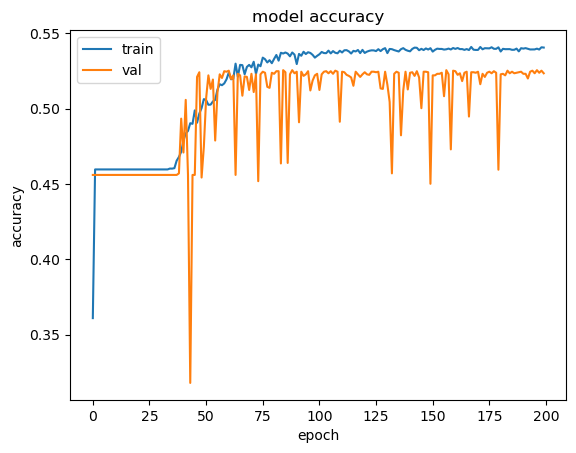

In [102]:
plt.figure()
plt.plot(ret.history_['accuracy'])
plt.plot(ret.history_['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [103]:
score_test = estimator.model_.evaluate(x_test, y_test, verbose=0)
score_train = estimator.model_.evaluate(x_train, y_train, verbose=0)

In [104]:
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[2])
print("")
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[2])

Test loss: 0.11209850013256073
Test accuracy: 0.5317646861076355

Train loss: 0.11150533705949783
Train accuracy: 0.5397605299949646


193/193 [==============================] - 0s 1ms/step


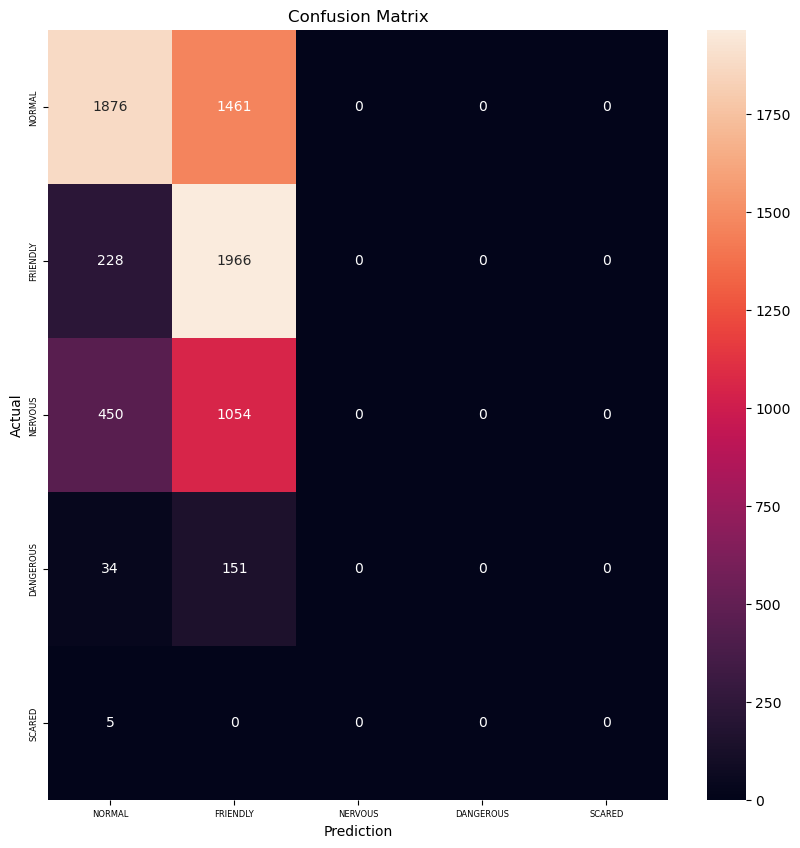

In [105]:
# predict on test and training sets
yhat_test = estimator.predict(x_test)
yhat_train = estimator.predict(x_train)
# display confusion matrix of all classes
cm = confusion_matrix(y_test.values.argmax(axis=1), yhat_test.argmax(axis=1))
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_ylim([0,6])
ax1.set_xlim([0,6])
sns.heatmap(cm,
          annot=True,
          fmt='g',
          xticklabels=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
          yticklabels=['NORMAL', 'FRIENDLY', 'NERVOUS', 'DANGEROUS', 'SCARED'],
          ax=ax1)
plt.ylabel('Actual', fontsize=10)
plt.xlabel('Prediction', fontsize=10)
plt.title('Confusion Matrix', fontsize=12)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
plt.show()